# 01 Importing libraries and data

In [60]:
# Importing libraries with 3 new libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [61]:
# defining the path for the export code
path = R'/Users/peterguan/Instacart Basket Analysis'

In [62]:
# Importing the 'ords_prods_merge_flag' dataframe, 'pkl' format
ords_prods_merge = pd.read_pickle(r'/Users/peterguan/Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_merge_flag.pkl')

# 02 Creating a bar chart

In [64]:
# Checking the names of all the columns
ords_prods_merge.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', 'inner_merge',
       'price_range_loc', 'busiest_day', 'busiest_days', 'slowest days',
       'slowest_days', 'busiest_period_of_day', 'slowest_and_busiest_days',
       'max_order', 'loyalty_flag', 'average_prices', 'spending_flag',
       'order_frequency', 'order_frequency_flag'],
      dtype='object')

<Axes: xlabel='orders_day_of_week'>

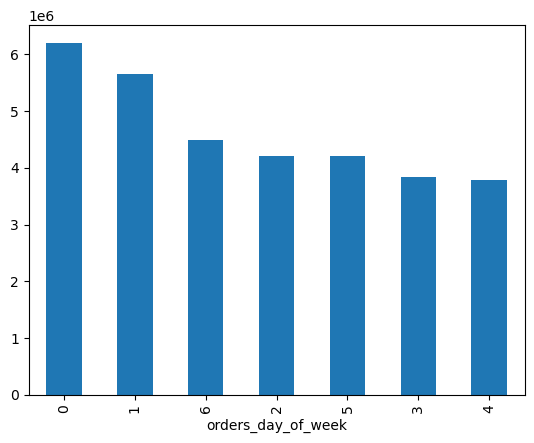

In [65]:
# Creating a bar chart with the 'orders_day_of_week' column
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

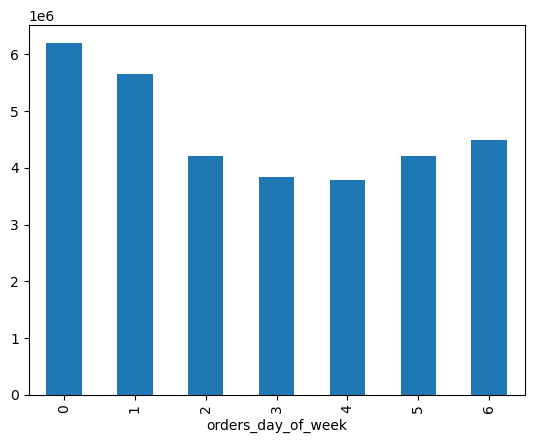

In [66]:
# Sorting the bar chart by 'sort_index'
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [67]:
# Checking the frequency
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204231
1    5660285
6    4496545
2    4213870
5    4205818
3    3840557
4    3783816
Name: count, dtype: int64

In [68]:
# Checking the frequency WITH 'sort_index'
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204231
1    5660285
2    4213870
3    3840557
4    3783816
5    4205818
6    4496545
Name: count, dtype: int64

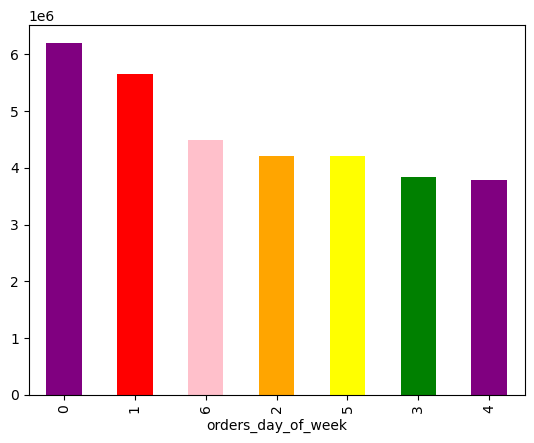

In [69]:
# Adding colors to the bar chart with the COLOR argument
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green'])

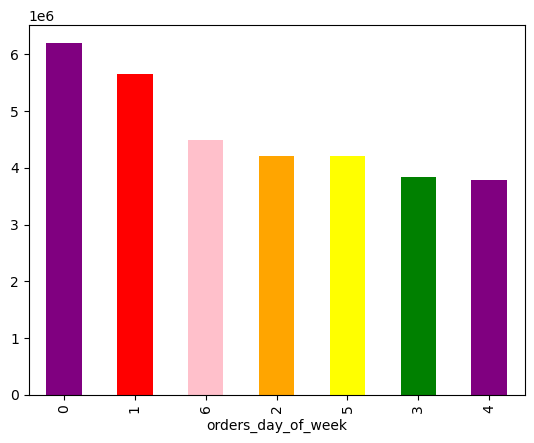

In [70]:
# Printing the bar chart visualization
bar.figure

In [71]:
# Saving and exporting the bar chart as an image file using 'figure.savefig' 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 03 Creating a histogram

<Axes: ylabel='Frequency'>

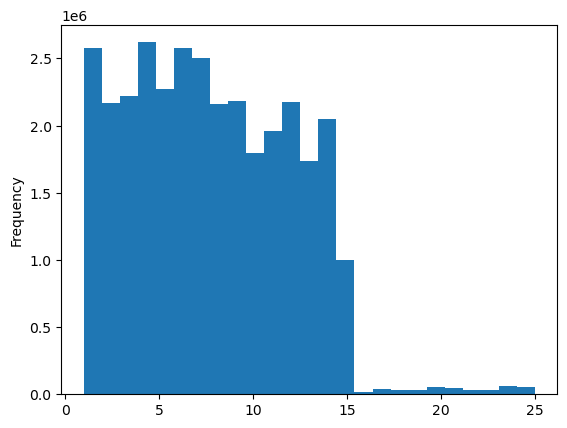

In [72]:
# Creating a HISTOGRAM of the 'prices' column
ords_prods_merge['prices'].plot.hist(bins = 25)

# 04 Creating a scatterplot

<Axes: xlabel='prices', ylabel='prices'>

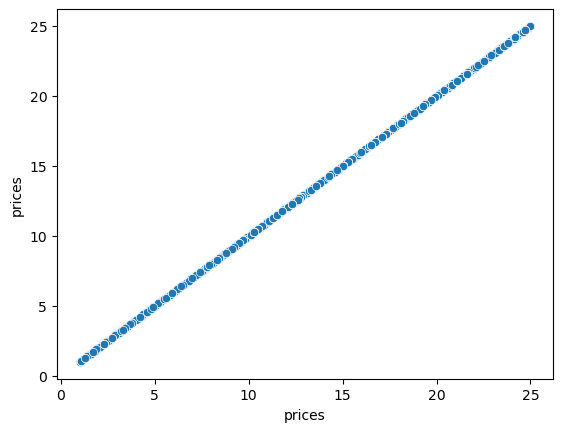

In [90]:
# Creating a scatterplot of the 'prices' column (SEABORN library: SNS)
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

# 05 Fixing the histogram if it wasn't already fixed (outliers in the 'prices' column)

In [94]:
# Checking if there are any number > 100 in the 'prices' column in the 'ords_prods_merge' dataframe
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,slowest days,slowest_days,busiest_period_of_day,slowest_and_busiest_days,max_order,loyalty_flag,average_prices,spending_flag,order_frequency,order_frequency_flag


In [104]:
# Marking any value over 100 as 'NaN'
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [106]:
# Checking the max number in the 'prices' column
ords_prods_merge['prices'].max()

25.0

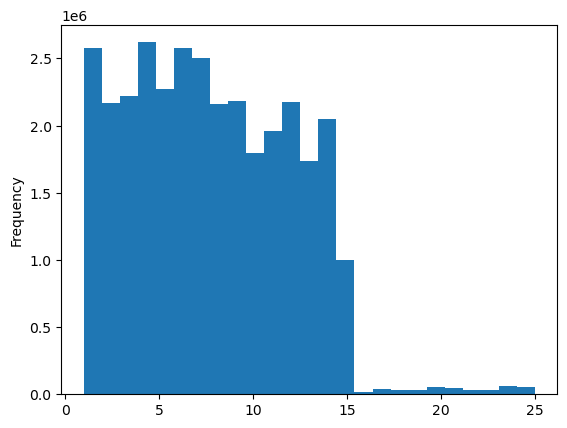

In [115]:
# Creating the histogram again AFTER the CLEANING steps above
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

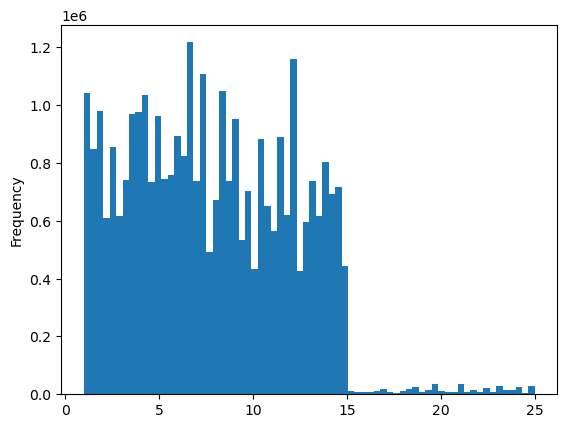

In [117]:
# Creating a histogram with thinner columns by changing the BINS to 70
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [119]:
# Exporting and saving the histogram as an image file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

# 06 Sampling data

In [126]:
# Setting the 'seed' as (4) and creating a new list called 'dev' that stores your BOOLEAN values, 
# OUTPUTS true or false depending on the value being <= to 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [132]:
# Running the 'dev' list
dev

array([False,  True, False, ...,  True,  True,  True])

In [136]:
# Producing a RANDOM LIST of numbers BETWEEN 0 and 1
np.random.rand(10)

array([0.68846555, 0.89906944, 0.37959751, 0.8004591 , 0.00929077,
       0.37299995, 0.81385528, 0.28981749, 0.55979197, 0.26944345])

In [138]:
# Storing 70% of the sample in 'big'
big = ords_prods_merge[dev]

In [140]:
# Storing 30% of the sample in 'small'
small = ords_prods_merge[~dev]

In [146]:
# Using the LEN function to find the length of the dataframe
len(ords_prods_merge)

32405122

In [148]:
# Adding the two dataframes, big and small, to check if the number of rows match
len(big) + len(small)

32405122

In [150]:
# Creating a new dataframe, 'df_2', that only contains the 2 columns, 'orders_day_of_week' and 'prices'
df_2 = small[['orders_day_of_week','prices']]

# 07 Creating a linechart

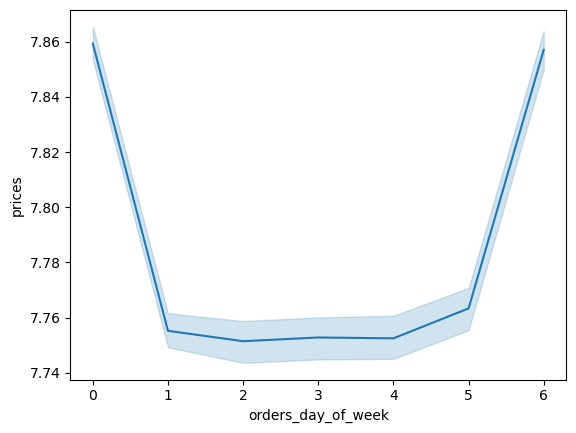

In [154]:
# Creating a line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [156]:
# Exporting and saving the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png'))